## Libraries

In [17]:
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [18]:
# Read the file resulsSPECIFICITY.csv into a pandas dataframe
df = pd.read_csv('resultsSPECIFICITY.csv', delimiter=';')

# Group the dataframe by OldFM, NewFM, Generator, and for the other columns compute the average
# df = df.groupby(['OldFM', 'NewFM', 'Generator']).mean()
# Reset the index
# df = df.reset_index()

## Wilcoxon-Signed Rank Tests

In [19]:
def test(datax, datay, label):
    test_times = stats.wilcoxon(datax, datay, alternative='two-sided', method='approx')
    print ("*** Test on " + label + " ***")
    print (test_times)
    print (datax.mean())
    print (datay.mean())
    print ("Effect size: " + str(test_times.zstatistic / math.sqrt(len(datax) + len(datay))))

### Fault detection

In [20]:
faultDetectionACTS = df.loc[df['Generator'] == 'ACTS', 'FaultDetection'].values
faultDetectionSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'FaultDetection'].values
faultDetectionBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'FaultDetection'].values
faultDetectionMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'FaultDetection'].values
# Test the difference between the two generators
test(faultDetectionACTS, faultDetectionSPEC, "ACTS vs SPECIFICITY")
test(faultDetectionACTS, faultDetectionBDD, "ACTS vs BDD")
test(faultDetectionACTS, faultDetectionMUTTESTGENERATOR, "ACTS vs MUTTESTGENERATOR")
test(faultDetectionBDD, faultDetectionSPEC, "BDD vs SPECIFICITY")
test(faultDetectionBDD, faultDetectionMUTTESTGENERATOR, "BDD vs MUTTESTGENERATOR")
test(faultDetectionSPEC, faultDetectionMUTTESTGENERATOR, "SPECIFICITY vs MUTTESTGENERATOR")


*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=3848.5, pvalue=0.3404856368181769)
0.7405379397195122
0.7403337821951219
Effect size: -0.02353774786759459
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=3028.0, pvalue=0.24742858434350168)
0.7405379397195122
0.7405480487073172
Effect size: -0.028560638547062474
*** Test on ACTS vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=2876.5, pvalue=0.7133477259770707)
0.7405379397195122
0.7405356341463414
Effect size: -0.009071400601199188
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=3449.0, pvalue=0.05953263139651019)
0.7405480487073172
0.7403337821951219
Effect size: -0.046527969889320626
*** Test on BDD vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=3073.0, pvalue=0.14308171195177835)
0.7405480487073172
0.7405356341463414
Effect size: -0.03616104966515306
*** Test on SPECIFICITY vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=3930.5, pvalue=0.6374557474646176)
0.7403337821951219
0.7405356341463414
Effect s

### Specificity

In [21]:
specificityACTS = df.loc[df['Generator'] == 'ACTS', 'Specificity'].values
specificitySPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'Specificity'].values
specificityBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'Specificity'].values
specificityMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'Specificity'].values
# Test the difference between the two generators
test(specificityACTS, specificitySPEC, "ACTS vs SPECIFICITY")
test(specificityACTS, specificityBDD, "ACTS vs BDD")
test(specificityACTS, specificityMUTTESTGENERATOR, "ACTS vs MUTTESTGENERATOR")
test(specificityBDD, specificitySPEC, "BDD vs SPECIFICITY")
test(specificityBDD, specificityMUTTESTGENERATOR, "BDD vs MUTTESTGENERATOR")
test(specificitySPEC, specificityMUTTESTGENERATOR, "SPECIFICITY vs MUTTESTGENERATOR")

*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=0.0, pvalue=7.90216145052745e-48)
0.48209446409756096
0.5579815312195122
Effect size: -0.3587755380714511
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=1975.0, pvalue=3.5344743998990417e-12)
0.48209446409756096
0.5020494618292684
Effect size: -0.17173275196012294
*** Test on ACTS vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=24595.0, pvalue=0.015384547941909623)
0.48209446409756096
0.49128920109756097
Effect size: -0.059836604329531966
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=0.0, pvalue=3.601424592468284e-46)
0.5020494618292684
0.5579815312195122
Effect size: -0.35225598666808555
*** Test on BDD vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=23700.0, pvalue=0.003537947812761864)
0.5020494618292684
0.49128920109756097
Effect size: -0.07202192507822047
*** Test on SPECIFICITY vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=10885.0, pvalue=9.778554583105657e-26)
0.5579815312195122
0.4912892010975

### Time

In [22]:
timeACTS = df.loc[df['Generator'] == 'ACTS', 'Time'].values
timeSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'Time'].values
timeBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'Time'].values
timeMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'Time'].values
# Test the difference between the two generators
test(timeACTS, timeSPEC, "ACTS vs SPECIFICITY")
test(timeACTS, timeBDD, "ACTS vs BDD")
test(timeACTS, timeMUTTESTGENERATOR, "ACTS vs MUTTESTGENERATOR")
test(timeBDD, timeSPEC, "BDD vs SPECIFICITY")
test(timeBDD, timeMUTTESTGENERATOR, "BDD vs MUTTESTGENERATOR")
test(timeSPEC, timeMUTTESTGENERATOR, "SPECIFICITY vs MUTTESTGENERATOR")

*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=0.0, pvalue=7.533781426228936e-136)
131.5780487804878
28.102439024390243
Effect size: -0.612565217888942
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=0.0, pvalue=7.532974403498797e-136)
131.5780487804878
26.670731707317074
Effect size: -0.6125653243515039
*** Test on ACTS vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=0.0, pvalue=7.530371079816816e-136)
131.5780487804878
30.503658536585366
Effect size: -0.6125656678599919
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=83984.0, pvalue=2.4589481121403265e-12)
26.670731707317074
28.102439024390243
Effect size: -0.17299145067070215
*** Test on BDD vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=49241.0, pvalue=3.400954570288924e-49)
26.670731707317074
30.503658536585366
Effect size: -0.36405823856480185
*** Test on SPECIFICITY vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=82245.5, pvalue=2.115481054050597e-19)
28.102439024390243
30.503658536585366
Effec

### Size

In [23]:
sizeACTS = df.loc[df['Generator'] == 'ACTS', 'Size'].values
sizeSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'Size'].values
sizeBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'Size'].values
sizeMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'Size'].values
# Test the difference between the two generators
test(sizeACTS, sizeSPEC, "ACTS vs SPECIFICITY")
test(sizeACTS, sizeBDD, "ACTS vs BDD")
test(sizeACTS, sizeMUTTESTGENERATOR, "ACTS vs MUTTESTGENERATOR")
test(sizeBDD, sizeSPEC, "BDD vs SPECIFICITY")
test(sizeBDD, sizeMUTTESTGENERATOR, "BDD vs MUTTESTGENERATOR")
test(sizeSPEC, sizeMUTTESTGENERATOR, "SPECIFICITY vs MUTTESTGENERATOR")

*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=155.0, pvalue=7.707388999435289e-56)
8.475609756097562
9.817073170731707
Effect size: -0.3887384569089845
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=0.0, pvalue=2.266903787903307e-36)
8.475609756097562
9.292682926829269
Effect size: -0.31099642603569044
*** Test on ACTS vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=70175.0, pvalue=8.710268717677615e-25)
8.475609756097562
7.097560975609756
Effect size: -0.25383623534232036
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=555.0, pvalue=9.195188729699791e-38)
9.292682926829269
9.817073170731707
Effect size: -0.31718050662953773
*** Test on BDD vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=65620.0, pvalue=1.2104442691950733e-28)
9.292682926829269
7.097560975609756
Effect size: -0.2741737432368765
*** Test on SPECIFICITY vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=69550.0, pvalue=2.0686800487060757e-35)
9.817073170731707
7.097560975609756
Effect siz

## Box-Plots

In [24]:
def box_plot(y1, y2, y3, y4, ylabel, xscale = 'log', plot_correspondence = False, scale = 1, showfliers = True):
    plt.figure(figsize=(4,2.5))
    sns.boxplot(data=[y1/scale, y2/scale, y3/scale, y4/scale], orient='h', showfliers = showfliers, showmeans=True, meanprops={"marker":"o","markerfacecolor":"red", "markeredgecolor":"white"})
    plt.xscale(xscale)
    plt.yticks(range(4), labels=['ACTS', 'BDD', 'SPECGEN', 'MUTTESTGEN'])
    plt.xlabel(ylabel)
    plt.show()

### Fault detection

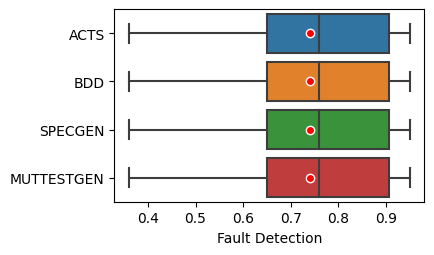

In [25]:
box_plot(faultDetectionACTS, faultDetectionBDD, faultDetectionSPEC, faultDetectionMUTTESTGENERATOR, 'Fault Detection', xscale = 'linear', scale = 1, showfliers = False)

### Specificity

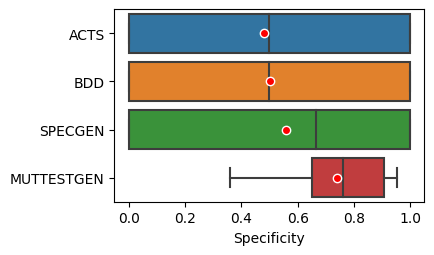

In [26]:
box_plot(specificityACTS, specificityBDD, specificitySPEC, faultDetectionMUTTESTGENERATOR, 'Specificity', xscale = 'linear', scale = 1, showfliers = False)

### Time

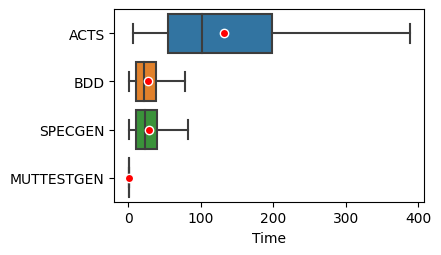

In [27]:
box_plot(timeACTS, timeBDD, timeSPEC, faultDetectionMUTTESTGENERATOR, 'Time', xscale = 'linear', scale = 1, showfliers = False)

### Size

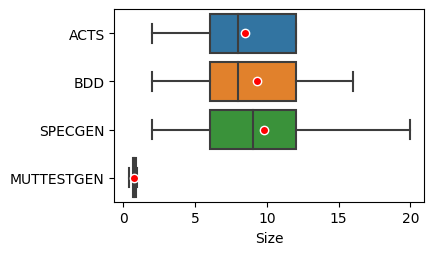

In [28]:
box_plot(sizeACTS, sizeBDD, sizeSPEC, faultDetectionMUTTESTGENERATOR, 'Size', xscale = 'linear', scale = 1, showfliers = False)